In [7]:
import os, sys
import numpy as np
# from pyecharts import options as opt

project_path = os.path.dirname(os.getcwd())
sys.path.append(project_path)

data_dir = r"{}\data\final_ex_data".format(project_path)

file_name = "origin_data.xlsx"
data_path = r"{}\{}".format(data_dir, file_name)

print(data_dir, "\t", data_path)

c:\Users\Administrator\projects\python\matplotlib_vision\data\final_ex_data 	 c:\Users\Administrator\projects\python\matplotlib_vision\data\final_ex_data\origin_data.xlsx


In [8]:
def read_file_path(file_name):
    return "{}\{}".format(data_dir, file_name)

In [3]:
# import pandas as pd

# data = pd.read_excel(data_path, "上市公司并购新闻", index_col=0)

# fillNaN_dict = {
#     "MAprice":0,
#     "State": "无",
#     "Currut": "未知",
#     "Sellernm": "无",
#     "Subnm":"无",
#     "Eqtrart": 0
# }
# for col_name, value in fillNaN_dict.items():
#     data[col_name] = data[col_name].fillna(value)

# def corporation_name(series):
#     sellernm = series["Sellernm"]
#     subnm = series["Subnm"]

#     if sellernm == "无":
#         return subnm
#     elif subnm == "无":
#         return sellernm
    
#     if len(sellernm) < len(subnm):
#         return sellernm
#     else:
#         return subnm
    
# data["corporation_name"] = data.apply(corporation_name, axis=1)


In [9]:
data = pd.read_csv(read_file_path("processed_data.csv"))
cond1 = data['MAprice'] != 0
cond2 = data['Ifrumor'] == "否"
cond3 = data['State'] == "无"
cond4 = data['Currut'] == "人民币"
real_merger_data = data.loc[cond1 & cond2 & cond3 & cond4]

In [10]:
real_merger_data = real_merger_data.copy(deep=True)

# 筛选出 真实 且 交易以亿元为单位的 公司合并 数据
real_merger_data.drop_duplicates(subset="Coname", inplace=True)

def maprice_filter(series):
    maprice = series["MAprice"]
    if str.__contains__(maprice, "亿元"):
        try:
            series["MAprice"] = float(maprice.removesuffix("亿元"))
            return series
        except:
            return

real_merger_data = real_merger_data.apply(maprice_filter, axis=1)


real_merger_data.dropna(axis=0, how="all", inplace=True)

real_merger_data["NewsDt"] = pd.to_datetime(real_merger_data["NewsDt"])

In [11]:
def getDataRangeFrom(start_year, end_year, data, column_name="NewsDt"):
    # column 提前转换为 datetime 类型
    cond1 = start_year <= data[column_name]
    cond2 = data[column_name] < end_year
    
    return data.loc[cond1 & cond2]



In [52]:
# 200x - 201z 1-12 data.csv
cond1 = data['MAprice'] != 0
cond2 = data['Ifrumor'] == "否"
cond3 = data['State'] == "无"
temp_merger_data = data.loc[cond1 & cond2 & cond3]

temp = pd.DataFrame()

range_data = getDataRangeFrom("2004", "2020", temp_merger_data )

range_data["known_price_count"] = range_data["MAprice"]

def _map(value):
    if value != 0:
        return 1

range_data["known_price_count"] = range_data["known_price_count"].map(_map)
range_data["NewsDt"] = pd.to_datetime(range_data["NewsDt"], format="%Y-%m-%d")

temp["year"] = range_data["NewsDt"].dt.year
temp["month"] = range_data["NewsDt"].dt.month
temp["MAprice"] = range_data["MAprice"]
temp["known_price_count"] = range_data["known_price_count"]

# temp["MAprice"] = temp["MAprice"].apply(lbd_func)

temp1 = temp.groupby(["year", "month"]).sum()
# print(temp1)
# print(temp.shape)
# print(temp1)
# print(data_dir)
# temp1.to_csv("{}\{}".format(data_dir, "known_price_count.csv"))
# temp1["MAprice"] = sp_data["MAprice"]

# real_merger_data.to_csv("{}\{}".format(data_dir, "real_merger_data.csv"))

In [59]:

kpc_df["price"] = sp_data["MAprice"]

print(kpc_df)

kpc_df.to_csv(read_file_path("known_price_count.csv"))

     year  month  known_price_count    price
0    2004      1                  0    0.000
1    2004      2                  0    0.000
2    2004      3                  1    0.000
3    2004      4                  0    0.000
4    2004      5                  0    0.000
..    ...    ...                ...      ...
187  2019      8                 75   49.130
188  2019      9                 71  124.120
189  2019     10                 75   61.230
190  2019     11                 86   46.590
191  2019     12                112   62.158

[192 rows x 4 columns]


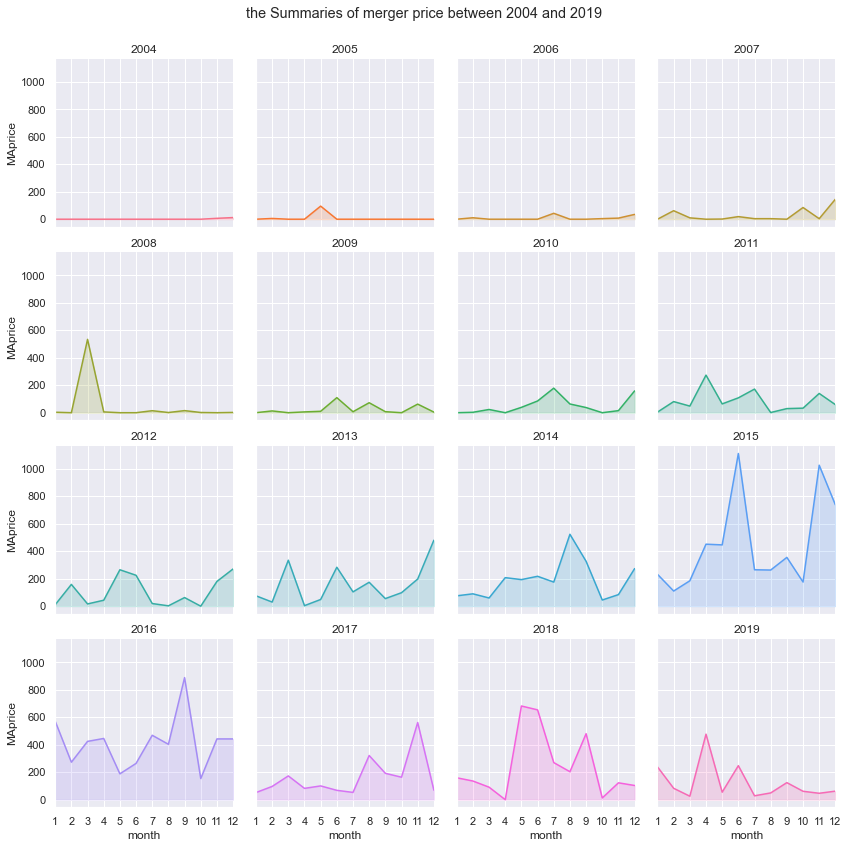

In [55]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")


sp_data = pd.read_csv(read_file_path("sixteen_price.csv"))


# Create a grid : initialize it
g = sns.FacetGrid(data=sp_data, col='year', hue='year', col_wrap=4, )

# Add the line over the area with the plot function
g = g.map(plt.plot, 'month', 'MAprice')
 
# Fill the area with fill_between
g = g.map(plt.fill_between, 'month', 'MAprice', alpha=0.2).set_titles("{col_name} year")
 
# Control the title of each facet
g = g.set_titles("{col_name}")
 
# Add a title for the whole plot
plt.subplots_adjust(top=0.92)
g = g.fig.suptitle('the Summaries of merger price between 2004 and 2019 ')

plt.xticks(np.arange(1, 13))
plt.xlim(1, 12)

# Show the graph
plt.show()


Text(0.5, 1.0, 'the heap plot display merger price between  2004 and 2019 ')

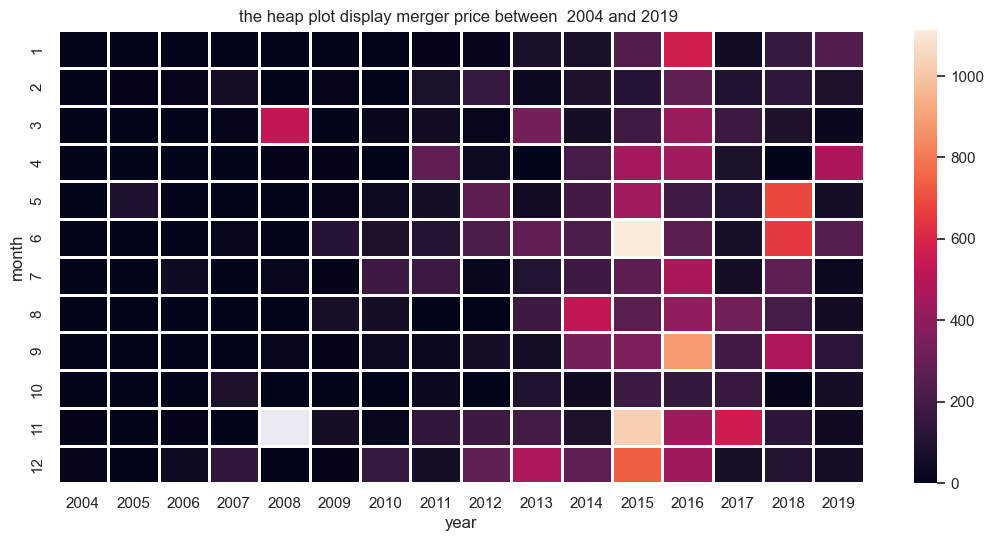

In [16]:
heap_data = sp_data.pivot('month', 'year', 'MAprice')

plt.figure(figsize=(13, 6), dpi=100)
sns.heatmap(heap_data, xticklabels=1, linewidths=1,linecolor='white')
plt.title("the heap plot display merger price between  2004 and 2019 ")

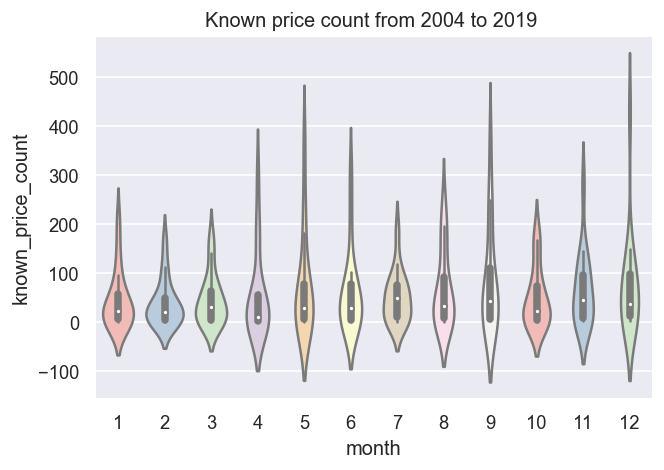

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

kpc_df = pd.read_csv(read_file_path("known_price_count.csv"))

plt.figure(dpi=120)

sns.set(style="darkgrid")
 

# print(kpc_df)
# Grouped violinplot
sns.violinplot(x="month", y="known_price_count", data=kpc_df, palette="Pastel1")
plt.title("Known price count from 2004 to 2019 ")
plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# kpc_df = pd.read_csv(read_file_path("known_price_count.csv"))
# month_dict = {1: 'january',
#               2: 'february',
#               3: 'march',
#               4: 'april',
#               5: 'may',
#               6: 'june',
#               7: 'july',
#               8: 'august',
#               9: 'september',
#               10: 'october',
#               11: 'november',
#               12: 'december'}

# # we create a 'month' column
# kpc_df['month'] = kpc_df['month'].map(month_dict)

# kpc_df = kpc_df.loc[kpc_df["year"] == 2016]
# # we generate a color palette with Seaborn.color_palette()
# pal = sns.color_palette(palette='coolwarm', n_colors=12)

# # in the sns.FacetGrid class, the 'hue' argument is the one that is the one that will be represented by colors with 'palette'
# g = sns.FacetGrid(kpc_df, row='month', hue='month', aspect=15, height=0.75, palette=pal)

# # then we add the densities kdeplots for each month
# g.map(sns.kdeplot, 'price',
#       bw_adjust=1, clip_on=False,
#       fill=True, alpha=1, linewidth=1.5)

# # here we add a white line that represents the contour of each kdeplot
# g.map(sns.kdeplot, 'price', 
#       bw_adjust=1, clip_on=False, 
#       color="w", lw=2)

# # here we add a horizontal line for each plot
# g.map(plt.axhline, y=0,
#       lw=2, clip_on=False)

# # we loop over the FacetGrid figure axes (g.axes.flat) and add the month as text with the right color
# # notice how ax.lines[-1].get_color() enables you to access the last line's color in each matplotlib.Axes
# for i, ax in enumerate(g.axes.flat):
#     ax.text(-15, 0.02, month_dict[i+1],
#             fontweight='bold', fontsize=15,
#             color=ax.lines[-1].get_color())
    
# # we use matplotlib.Figure.subplots_adjust() function to get the subplots to overlap
# g.fig.subplots_adjust(hspace=-0.3)

# # eventually we remove axes titles, yticks and spines
# g.set_titles("")
# g.set(yticks=[])
# g.despine(bottom=True, left=True)

# plt.setp(ax.get_xticklabels(), fontsize=15, fontweight='bold')
# plt.xlabel('Temperature in degree Celsius', fontweight='bold', fontsize=15)
# g.fig.suptitle('Daily average temperature in Seattle per month',
#                ha='right',
#                fontsize=20,
#                fontweight=20)

# plt.show()

13 	 13


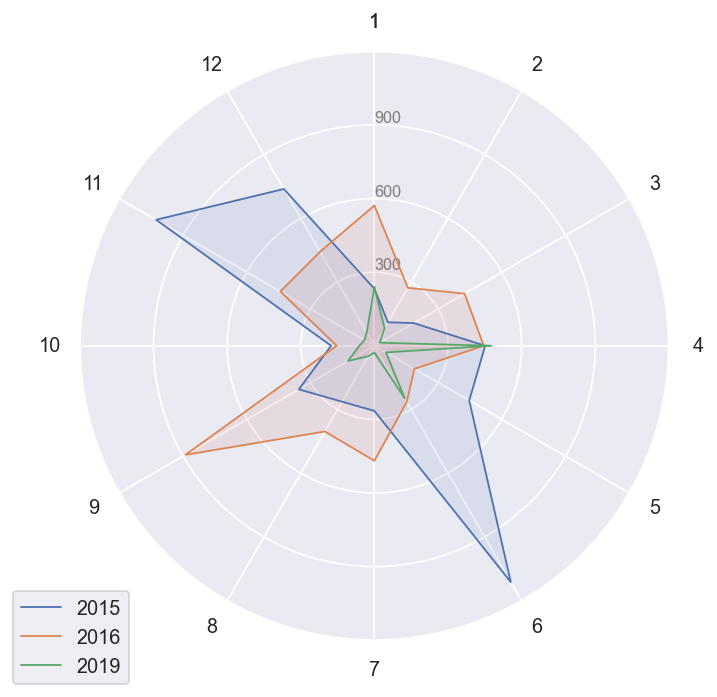

In [102]:
# 取 17 - 19 年
from math import pi
import matplotlib.pyplot as plt
import pandas as pd
# plt.rcParams['figure.figsize'] = (8.0, 8.0)

cond = sp_data['year'].isin([2015, 2016, 2019])
sub_data = sp_data.loc[cond].copy()
sub_data = sub_data.pivot('month', 'year', 'MAprice')

month = np.arange(1, 13).flatten().tolist()
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = np.linspace(0, 2 * np.pi, 12, endpoint=False).flatten().tolist()

plt.figure(figsize=(8, 6), dpi=130)
ax = plt.subplot(111, polar=True)
 
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 

month += month[:1]
angles += angles[:1]
plt.xticks(angles, month)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([ 300, 600, 900 ], ["300", "600", "900",], color="grey", size=9)
plt.ylim(0,1200)

# 2017
values= sub_data.iloc[:,0].values.flatten().tolist()
values += values[:1]

print(len(angles), "\t", len(values))
ax.plot(angles, values, linewidth=1, linestyle='solid', label="2015")
ax.fill(angles, values, 'b', alpha=0.1)
 
# 2018
values= sub_data.iloc[:,1].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="2016")
ax.fill(angles, values, 'r', alpha=0.1)
 
# 2019
values= sub_data.iloc[:,2].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="2019")
ax.fill(angles, values, 'r', alpha=0.1)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# # Show the graph
plt.show()


In [117]:

def get_distinct_media_data(data):
    new_media_data = pd.DataFrame(data["Newsmedia"].value_counts()).stack().reset_index()
    new_media_data.drop('level_1', axis=1, inplace=True)
    new_media_data.rename(columns={"level_0":"Newsmedia", 0:"count"}, inplace=True)

    new_media_price_data = pd.DataFrame(data.groupby(['Newsmedia'])["MAprice"].sum()).stack().reset_index()

    new_media_price_data.drop('level_1',axis=1, inplace=True)
    new_media_price_data.rename(columns={0:'price'}, inplace=True)

    return pd.merge(new_media_data, new_media_price_data)

real_merger_data = pd.read_csv(read_file_path("real_merger_data.csv"))
media_data = get_distinct_media_data(real_merger_data)
print(media_data)

all_media_data = get_distinct_media_data(data=data)

# print(all_media_data)


   Newsmedia  count        price
0      东方财富网    231  4740.585600
1        和讯网    152  2098.331000
2       凤凰财经    134  2127.576000
3        金融界    101  2244.480996
4         新浪     45  1377.413183
..       ...    ...          ...
78     每日财经网      1    30.000000
79       长城网      1    55.000000
80       东方网      1     2.210000
81       爱微帮      1    18.000000
82   Techweb      1    23.330000

[83 rows x 3 columns]


In [118]:
import random
p = media_data["price"]
p_sum = p.sum()

p = p / p_sum

c = media_data["count"]

c_sum = c.sum()
a = c_sum * p

media_data['d_count'] = a

# print(media_data)


media_filter = media_data[:17]
m_count = media_filter["count"]
m_f_sum = m_count.sum()
count_mean = m_f_sum / 17

count_shift = m_count - count_mean

ch1 = random.sample(range(0, 4), 4)
ch2 = np.array(random.sample(range(0, 13), 13)) + 4

ch = ch1 + ch2.tolist()

print(ch)
media_filter["count_shift"] = count_shift

print(media_filter.iloc[ch])

# _data = pre.append(rear)
# print(_data)
# print(c_filter_shift[choice])

# media_filter.to_csv("{}\{}".format(data_dir, "media_filter.csv"))

[2, 1, 0, 3, 10, 8, 15, 11, 4, 5, 6, 14, 13, 7, 16, 9, 12]
   Newsmedia  count        price     d_count  count_shift
2       凤凰财经    134  2127.576000   96.873025    77.235294
1        和讯网    152  2098.331000   95.541439    95.235294
0      东方财富网    231  4740.585600  215.848867   174.235294
3        金融界    101  2244.480996  102.195957    44.235294
10      搜狐财经     22  1103.150000   50.228748   -34.764706
8       南方财富     32   699.860000   31.866103   -24.764706
15      证券之星     16   199.870000    9.100503   -40.764706
11      中金在线     21   368.848000   16.794428   -35.764706
4         新浪     45  1377.413183   62.716529   -11.764706
5         网易     44   572.972500   26.088647   -12.764706
6      中国证券网     41  1249.390000   56.887363   -15.764706
14       中证网     17   216.150000    9.841766   -39.764706
13       新财界     17   233.135000   10.615129   -39.764706
7         搜狐     36   529.580000   24.112895   -20.764706
16       全景网     11   268.970000   12.246772   -45.764706
9        财经网 

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12056\1404163977.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  media_filter["count_shift"] = count_shift


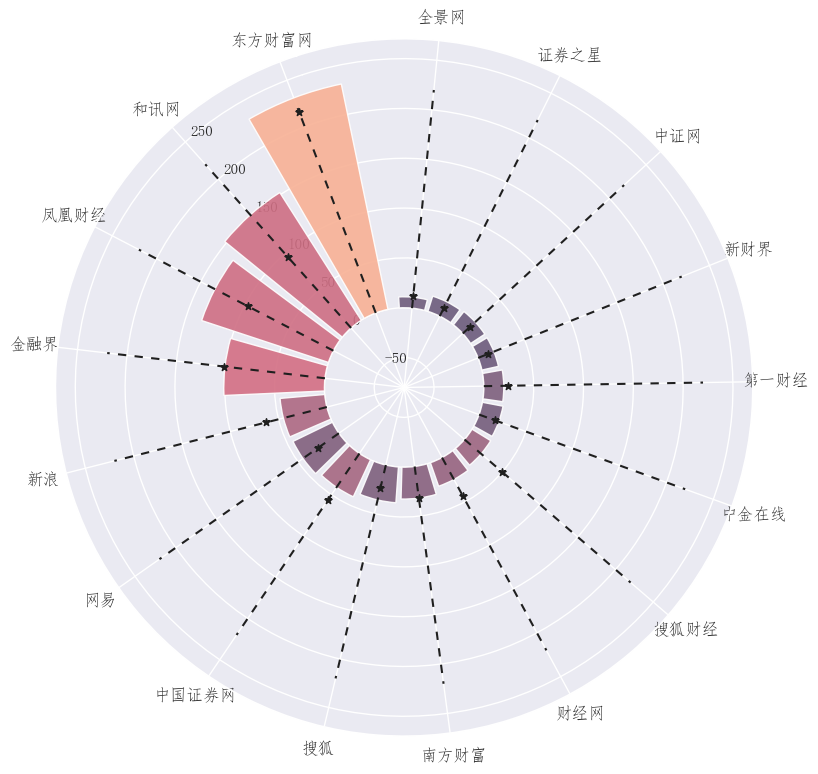

In [119]:
import matplotlib as mpl

media_data_softed = media_data.sort_values("count", ascending=False)

media_data_softed = media_data_softed[:17]


ANGLES = np.linspace(0.05, 2 * np.pi - 0.05, len(media_data_softed), endpoint=False)

COUNT = media_data_softed["count"].values
PRICE = media_data_softed["d_count"].values


GREY12 = "#1f1f1f"
plt.rcParams.update({"font.family": "FangSong"})
plt.rcParams["text.color"] = GREY12

plt.rc("axes", unicode_minus=False)

COLORS = ["#6C5B7B","#C06C84","#F67280","#F8B195"]
cmap = mpl.colors.LinearSegmentedColormap.from_list("my color", COLORS, N=256)

norm = mpl.colors.Normalize(vmin=PRICE.min(), vmax=PRICE.max())
COLORS = cmap(norm(PRICE))

plt.figure(figsize=(9, 11), dpi=100)
ax = plt.subplot(111, polar=True)
# fig, ax = plt.subplots(figsize=(10, 13), subplot_kw={"projection": "polar"})

# fig.patch.set_facecolor("white")
# ax.set_facecolor("white")

ax.set_theta_offset(1.2 * np.pi / 2)
ax.set_ylim(-80, 270)

# Add geometries to the plot -------------------------------------
# See the zorder to manipulate which geometries are on top

# Add bars to represent the cumulative track lengths
ax.bar(ANGLES, COUNT, color=COLORS, alpha=0.9, width=0.32, zorder=9)

# Add dashed vertical lines. These are just references
ax.vlines(ANGLES, 0, 220, color=GREY12, ls=(0, (4, 4)), zorder=12)

# Add dots to represent the mean gain
ax.scatter(ANGLES, PRICE, s=30, marker="*", color=GREY12, zorder=11)


# Add labels for the regions -------------------------------------
# Note the 'wrap()' function.
# The '5' means we want at most 5 consecutive letters in a word, 
# but the 'break_long_words' means we don't want to break words 
# longer than 5 characters.
MEDIA = media_data_softed["Newsmedia"].values

# Set the labels
ax.set_xticks(ANGLES)
ax.set_xticklabels(MEDIA, size=12);

In [139]:
media_filter_data_path = "{}\{}".format(data_dir, 'media_filter.csv')
media_filter_data = pd.read_csv(media_filter_data_path)

def get_random_index_for_filter():
    
    ch1 = random.sample(range(0, 4), 4)
    ch2 = np.array(random.sample(range(0, 13), 13)) + 4

    ch = ch1 + ch2.tolist()

In [216]:
m = len(all_media_data)

m_count = all_media_data["count"]
m_f_sum = m_count.sum()
count_mean = m_f_sum / m

count_shift = m_count - count_mean

import random

ch = random.sample(range(m), m)

# print(count_shift[ch])

all_media_data["count_shift"] = count_shift

# print(all_media_data)

(0.0, 250.0)

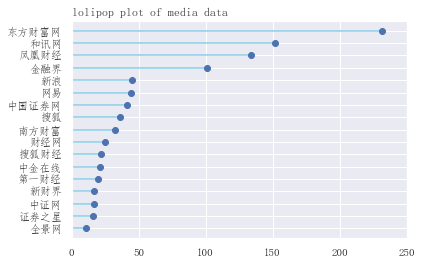

In [143]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

media_filter_data = pd.read_csv(read_file_path("media_filter.csv"))

 
# Reorder it based on the values
ordered_df = media_filter_data.sort_values(by='count')
my_range=range(1,len(media_filter_data.index)+1)
 
# The horizontal plot is made using the hline function
plt.hlines(y=my_range, xmin=0, xmax=ordered_df['count'], color='skyblue')
plt.plot(ordered_df['count'], my_range, "o")
 
# Add titles and axis names
plt.yticks(my_range, ordered_df['Newsmedia'])
plt.title("lolipop plot of media data", loc='left')
plt.xlim(0, 250)

In [229]:
_map = {}
def collect_data(series):
    coname = series["Coname"]
    ifrumor = series["Ifrumor"]
    state = series["State"]
    
    row = _map.get(coname, np.zeros(3))
    
    if ifrumor == "无":
        row[0] += 1
    
    # if state == ""
    pass

# data.apply(collect_data, axis=1)

ddd = np.zeros(3).reshape(1, -1)

ddd = np.vstack((ddd, np.zeros(3)))
print(ddd)

[[0. 0. 0.]
 [0. 0. 0.]]
